# Types of Errors in Hypothesis Testing
## [Type I and type II erros](https://en.wikipedia.org/wiki/Type_I_and_type_II_errors)
<br>
<table class="wikitable" borader = 2>
<tbody><tr>
<th rowspan="2" colspan="2">&#160;Table of error types
</th>
<th colspan="2"><br />Null hypothesis (<i>H</i><sub>0</sub>) is<br />&#160;
</th></tr>
<tr>
<th>True
</th>
<th>False
</th></tr>
<tr>
<th rowspan="2">Decision<br />About Null<br />Hypothesis (<i>H</i><sub>0</sub>)
</th>
<th>Fail to<br />reject
</th>
<td style="text-align:center;"><br />Correct inference <br />(True Negatives)<br />&#160;
</td>
<td style="text-align:center;"><br />Type&#160;II error <br />(False Negative)<br />&#160;
</td></tr>
<tr>
<th>Reject
</th>
<td style="text-align:center;"><br />Type I error <br />(False Positive)<br />&#160;
</td>
<td style="text-align:center;"><br />Correct inference<br />(True Positives)<br />&#160;
</td></tr></tbody></table>

In [5]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import math

In [6]:
def fnCalcPlotVar(mean, stdev, prob):
    step_range = 100
    x_min, x_max = (mean - 4 * stdev, mean + 4 * stdev) # plot x min and max
    x_val = np.linspace(x_min, x_max, step_range) # plot x range
    y_val = stats.norm.pdf(x_val, mean, stdev) # plot y : probability density function
    cr = stats.norm.ppf(prob, mean, stdev) # critical region
    x_area = np.linspace(cr, x_max, 100) # x range fill area
    y_area = stats.norm.pdf(x_area, mean, stdev) # y range of fill area
    return (x_val, y_val, cr, x_area, y_area)

### Type I error

기각역: 1.959963984540054


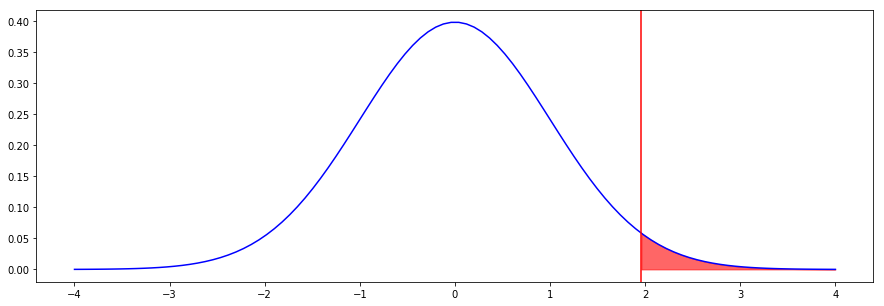

In [7]:
prob = 0.975
x1_mean, x1_stdev = (0, 1)
x1_val, y1_val, cr1, x1_area, y1_area = fnCalcPlotVar(x1_mean, x1_stdev, prob) 

print('기각역:', cr1)

# Draw Plot
plt.figure(figsize=(15,5))
plt.plot(x1_val, y1_val, 'b-')
plt.axvline(x=cr1, color='r')
plt.fill_between(x1_area, 0, y1_area, color='r', alpha=0.6)
plt.show()

### Type II error

critical value=7.960, alpha=0.025, beta=0.851


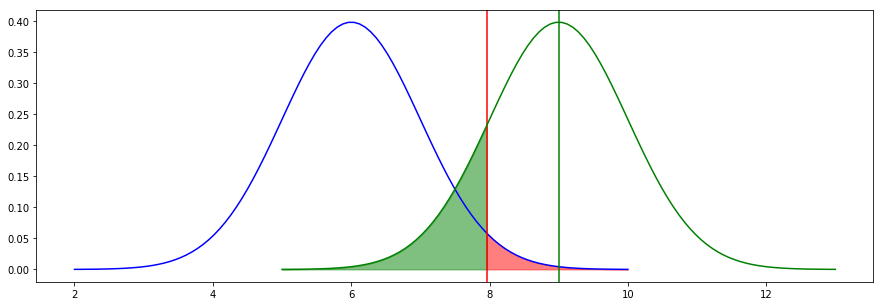

In [27]:
x1_mean, x1_stdev = (6, 1)
x2_mean, x2_stdev = (9, 1)

x1_val, y1_val, cr1, x1_area, y1_area = fnCalcPlotVar(x1_mean, x1_stdev, prob) 
x2_val, y2_val, cr2, x2_area, y2_area = fnCalcPlotVar(x2_mean, x2_stdev, prob) 

print('critical value=%1.3f, alpha=%1.3f, beta=%1.3f'
      % (cr1, 1-stats.norm.cdf(cr1,x1_mean, x1_stdev), 1-stats.norm.cdf(cr1,x2_mean, x2_stdev)))

# Draw Plot
plt.figure(figsize=(15,5))
plt.title('')
plt.plot(x1_val, y1_val, 'b-')
plt.axvline(x=cr1, color='r')
plt.fill_between(x1_area, 0, y1_area, color='r', alpha=0.5)

plt.plot(x2_val, y2_val, 'g-')
plt.axvline(x=x2_mean, color='g')
x_area = np.linspace(x2_mean-4*x2_stdev, cr1, 100) # x range fill area
y_area = stats.norm.pdf(x_area, x2_mean, x2_stdev) # y range of fill area
plt.fill_between(x_area, 0, y_area, color='g', alpha=0.5)

plt.show()